# Big Mart Mini Sale Project

In [1]:
import os 
import numpy as np
import pandas as pd
import warnings

In [2]:
train_d = pd.read_csv("C:\\Users\\Mateen\\Downloads\\9961_14084_bundle_archive\\Train.csv")
test_d = pd.read_csv("C:\\Users\\Mateen\\Downloads\\9961_14084_bundle_archive\\Test.csv")

In [3]:
train_d.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_d.head().count()

Item_Identifier              5
Item_Weight                  5
Item_Fat_Content             5
Item_Visibility              5
Item_Type                    5
Item_MRP                     5
Outlet_Identifier            5
Outlet_Establishment_Year    5
Outlet_Size                  4
Outlet_Location_Type         5
Outlet_Type                  5
Item_Outlet_Sales            5
dtype: int64

In [5]:
test_d.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
test_d.head().count()

Item_Identifier              5
Item_Weight                  4
Item_Fat_Content             5
Item_Visibility              5
Item_Type                    5
Item_MRP                     5
Outlet_Identifier            5
Outlet_Establishment_Year    5
Outlet_Size                  2
Outlet_Location_Type         5
Outlet_Type                  5
dtype: int64

In [7]:
train_d.shape

(8523, 12)

In [8]:
test_d.shape

(5681, 11)

In [9]:
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
test_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
train_d.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
test_d.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Missing Values

In [13]:
train_d.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
test_d.isnull().sum().sort_values(ascending= True)

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight                   976
Outlet_Size                  1606
dtype: int64

In [15]:
test_d.isnull().sum()/ test_d.isnull().shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [16]:
train_d.isnull().sum().sort_values(ascending= True)

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight                  1463
Outlet_Size                  2410
dtype: int64

In [17]:
train_d.isnull().sum()/train_d.isnull().shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [18]:
print("Item_Weight: \n", train_d.Item_Weight.value_counts())

Item_Weight: 
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


In [19]:
print("Item_MRP:\n",train_d.Item_MRP.value_counts())

Item_MRP:
 172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64


In [20]:
# Assuming your dataset is stored in a variable named "train_d"
median_outlet_size = train_d['Outlet_Size'].mode()

# Fill null values with the median
train_d['Outlet_Size'].fillna(median_outlet_size, inplace=True)

# Verify the filled values
print("Outlet_Size:\n", train_d['Outlet_Size'].value_counts())

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [21]:
print("Outlet_Type: \n",train_d.Outlet_Type.value_counts())

Outlet_Type: 
 Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [22]:
print("Item_Fat_Content: \n",train_d.Item_Fat_Content.value_counts())

Item_Fat_Content: 
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


In [23]:
print("train_d Null Values:\n",train_d['Outlet_Size'].isnull().sum())  , print("test_d Null Values :\n",test_d['Outlet_Size'].isnull().sum())

train_d Null Values:
 2410
test_d Null Values :
 1606


(None, None)

In [24]:
#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

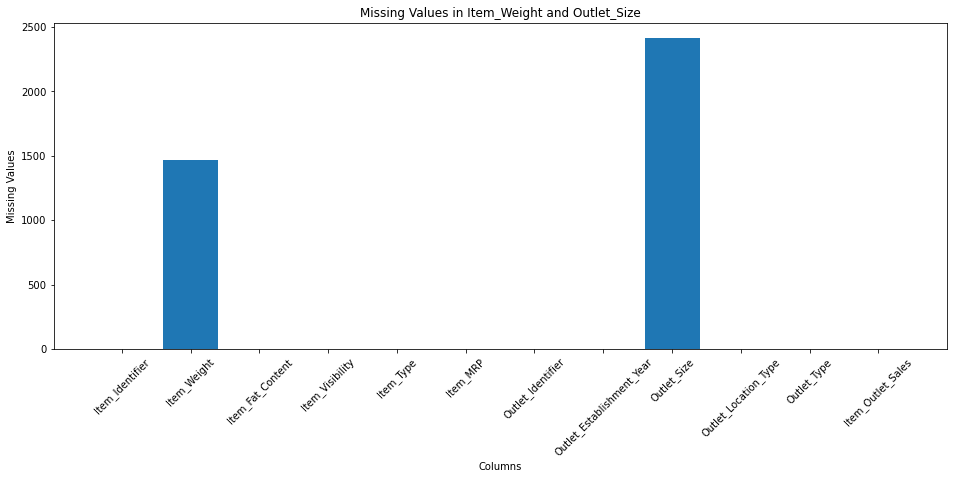

In [25]:
# Calculate the number of missing values in each column
missing_values = train_d.isnull().sum()
plt.figure(figsize=(16,6))
# Create the bar graph
plt.bar(missing_values.index, missing_values.values)

# Customize the graph
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Missing Values in Item_Weight and Outlet_Size')
plt.xticks(rotation=45)

# Display the graph
plt.show()

In [26]:
new_train_d = train_d.fillna(train_d.mode().iloc[0])

In [27]:
new_train_d.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
new_test_d = test_d.fillna(test_d.mode().iloc[0])

In [29]:
new_test_d.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<Figure size 1152x576 with 0 Axes>

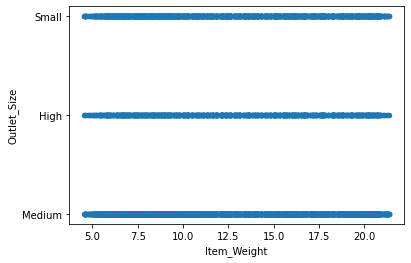

In [30]:
# Plot the data
plt.figure(figsize=(16,8))
new_train_d.plot(x='Item_Weight', y='Outlet_Size', kind='scatter')
plt.show()

In [31]:
# Separate categorical and numerical columns
categorical_columns = new_train_d.select_dtypes('object').columns.to_list()
numerical_columns = new_train_d.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [32]:
print(categorical_columns)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [33]:
print(numerical_columns)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [34]:
new_train_d[categorical_columns].value_counts()

Item_Identifier  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            LF                Soft Drinks            OUT035             Small        Tier 2                Supermarket Type1    1
FDV28            Regular           Frozen Foods           OUT010             Medium       Tier 3                Grocery Store        1
FDV32            Low Fat           Fruits and Vegetables  OUT035             Small        Tier 2                Supermarket Type1    1
                                                          OUT019             Small        Tier 1                Grocery Store        1
                                                          OUT018             Medium       Tier 3                Supermarket Type2    1
                                                                                                                                    ..
FDJ22            Low Fat           Snack Foods            OU

In [35]:
new_train_d[numerical_columns].value_counts()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Outlet_Sales
4.555        0.034329         110.1544  1987                       1230.3984            1
14.350       0.028519         109.2228  1998                       221.0456             1
14.500       0.000000         169.6448  2004                       2045.3376            1
                              159.3262  2004                       2864.2716            1
                              154.4682  1987                       1524.6820            1
                                                                                       ..
11.100       0.059797         151.8366  1987                       1057.9562            1
             0.054080         165.9526  2007                       2631.2416            1
             0.053765         163.1526  2004                       1808.9786            1
             0.053731         165.1526  1987                       1480.0734            1
21.350       0.

In [36]:
new_train_d.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
# Convert establishment year to age
new_train_d['Outlet_Age'] = 2020 - new_train_d['Outlet_Establishment_Year']

In [41]:
new_train_d['Outlet_Age'].head()

0    21
1    11
2    21
3    22
4    33
Name: Outlet_Age, dtype: int64

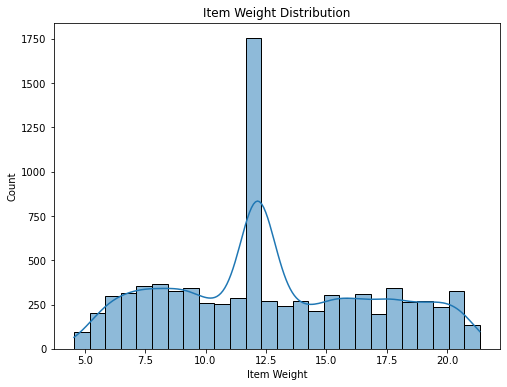

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Univariate plot for Item_Weight
plt.figure(figsize=(8, 6))
sns.histplot(new_train_d['Item_Weight'], kde=True)
plt.title('Item Weight Distribution')
plt.xlabel('Item Weight')
plt.ylabel('Count')
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


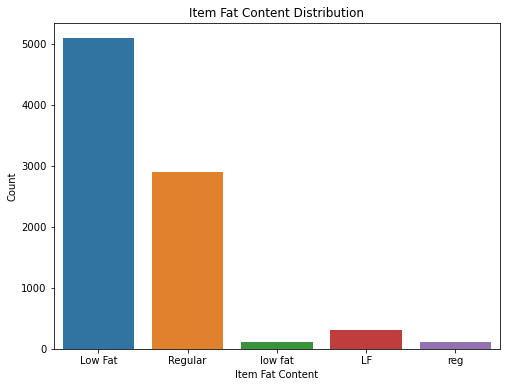

In [44]:
# Univariate plot for Item_Fat_Content
plt.figure(figsize=(8, 6))
sns.countplot(new_train_d['Item_Fat_Content'])
plt.title('Item Fat Content Distribution')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.show()



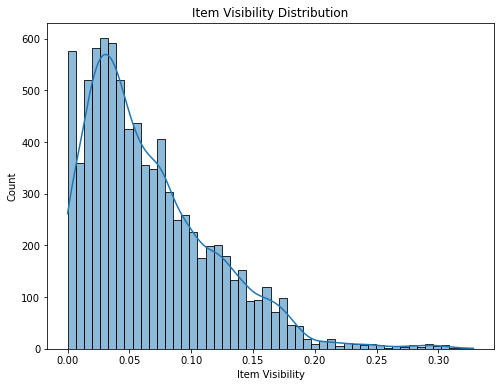

In [45]:
# Univariate plot for Item_Visibility
plt.figure(figsize=(8, 6))
sns.histplot(new_train_d['Item_Visibility'], kde=True)
plt.title('Item Visibility Distribution')
plt.xlabel('Item Visibility')
plt.ylabel('Count')
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


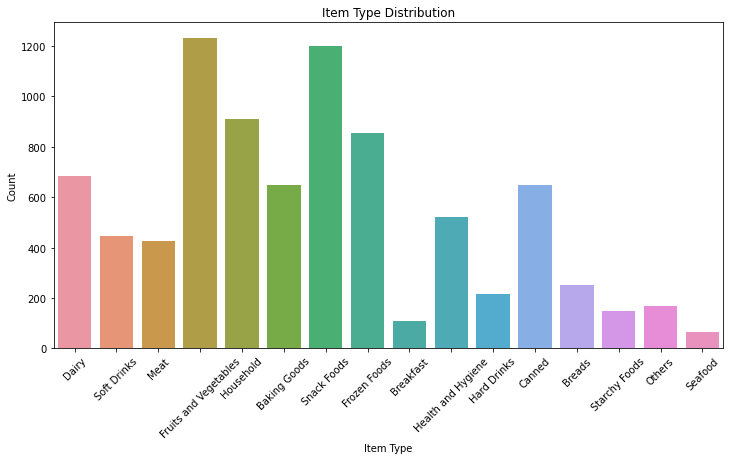

In [46]:
# Univariate plot for Item_Type
plt.figure(figsize=(12, 6))
sns.countplot(new_train_d['Item_Type'])
plt.title('Item Type Distribution')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



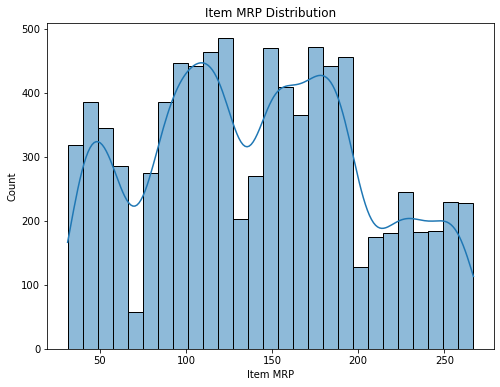

In [47]:
# Univariate plot for Item_MRP
plt.figure(figsize=(8, 6))
sns.histplot(new_train_d['Item_MRP'], kde=True)
plt.title('Item MRP Distribution')
plt.xlabel('Item MRP')
plt.ylabel('Count')
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


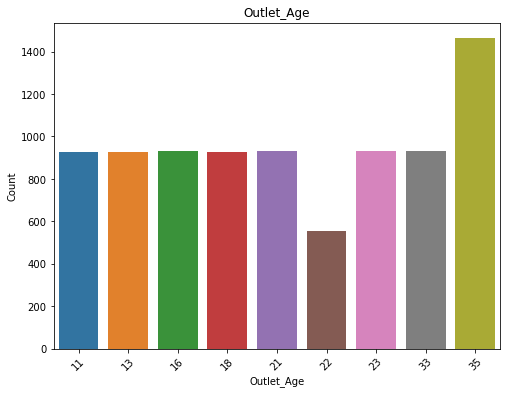

In [49]:
# Univariate plot for Outlet_Establishment_Year
plt.figure(figsize=(8, 6))
sns.countplot(new_train_d['Outlet_Age'])
plt.title('Outlet_Age')
plt.xlabel('Outlet_Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


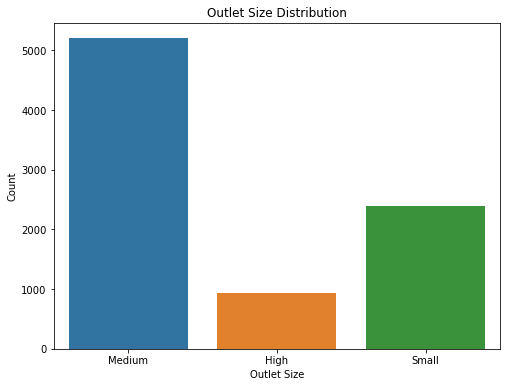

In [50]:
# Univariate plot for Outlet_Size
plt.figure(figsize=(8, 6))
sns.countplot(new_train_d['Outlet_Size'])
plt.title('Outlet Size Distribution')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


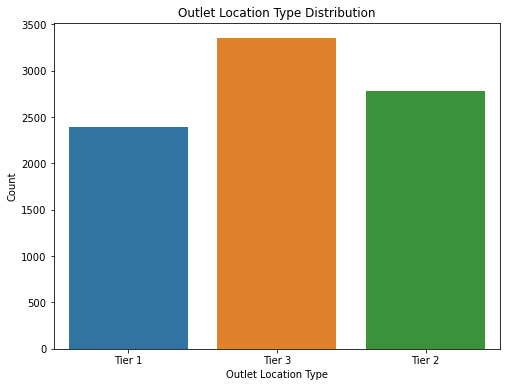

In [51]:
# Univariate plot for Outlet_Location_Type
plt.figure(figsize=(8, 6))
sns.countplot(new_train_d['Outlet_Location_Type'])
plt.title('Outlet Location Type Distribution')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


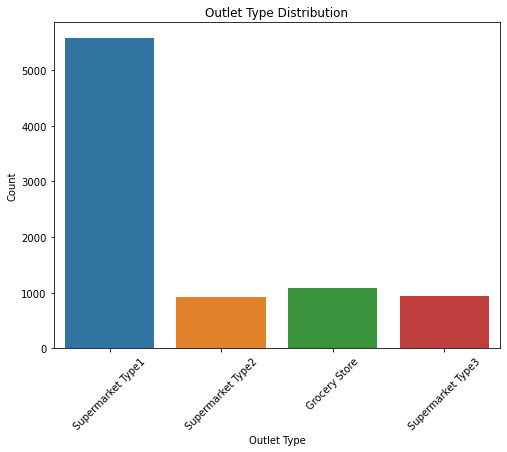

In [52]:
# Univariate plot for Outlet_Type
plt.figure(figsize=(8, 6))
sns.countplot(new_train_d['Outlet_Type'])
plt.title('Outlet Type Distribution')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



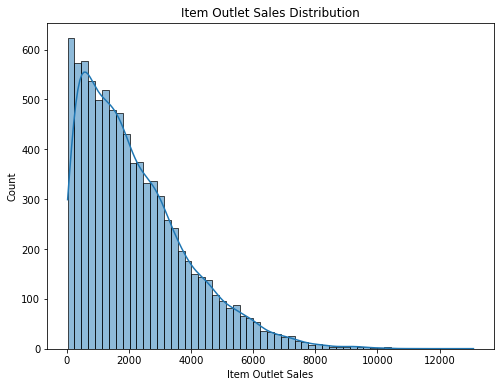

In [53]:
# Univariate plot for Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.histplot(new_train_d['Item_Outlet_Sales'], kde=True)
plt.title('Item Outlet Sales Distribution')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Count')
plt.show()
